# Final Project MOM6 Parallel I/O Investigation
## Matt Watwood

This project was an investigation of the MOM6 (Modular Ocean Model 6) project and specfically following the work in *Parallel I/O in FMS and MOM5* by Yang and Ward included in this repository. See the powerpoint presentation in the repository for further details and summarized results. 

The work of implementing the parallel I/O was to be done by staff scientist at NCAR Alper Altuntas. Special thanks to him and Gustavo Marques for their help in picking a project and suport throughout the process. At the time of writing this notebook, the Parallel I/O implementation is not available through the NCAR/MOM6 repository so all data here with MOM6 is done in serial as a benchmark to be worked with later.

The data gathered was done using the CU Boulder Research Computing Cluster called Summit. Additional thanks to the awesome staff there for dealing with my silly questions. The case used for all MOM6 tests was the global_ALE case of the ocean_only section of the [NOAA-GFDL MOM6 Examples](https://github.com/NOAA-GFDL/MOM6-examples) repository. All test cases were run for 1 day to minimize data creation.

The MOM6 model used for all testing was built using the instructions given on the [NCAR-cases wiki page](https://github.com/NCAR/MOM6-cases/wiki) specific to the CU Boulder Summit cluster. Jobs were submitted similar to the example shown therein. Complete data is available on request, but excluded to minimize repository size. The final addition was to adjust the input.nml file to include a directive to output the mpp_open, mpp_read, mpp_write, and mpp_close timing information. The additional three lines are shown here

```
&mpp_io_nml
            io_clocks_on = T
/
```

Variety was added to the testing scenarios in two ways. First, the number of processes per node were changed to show local scalability, but did not show any intersting results so only 1 and 2 processes are shown here. Secondly to alter the I/O load the number of parameters exported was varied. The first three cells below in this notebook show those results individually as functions of total percentage load of the computation time.



### Case 1 - Default amount of output data when pulled from the repo

Text(0.5,0,'Nodes Used')

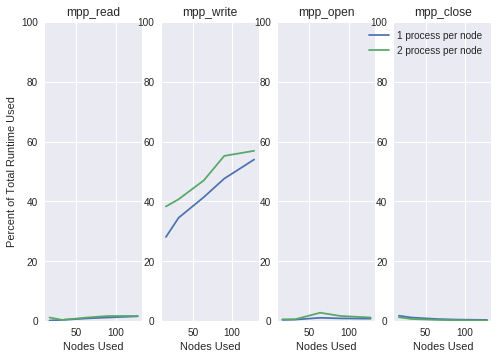

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy as np
plt.style.use('seaborn')

nodes =       [  16,   32,   64,  90,   128 ]

# Calculated as an average based on the output on the number of x/y cells used per node.
cells_1 =     np.array([4770, 2340, 1215, 864, 630 ])
cells_2 =     np.array([2340, 1215, 1215, 420, 294 ])

mpp_read_1 =  [ 0.2,  0.4,  0.9,  1.2,  1.6 ]
mpp_read_2 =  [ 1.2,  0.4,  1.2,  1.7,  1.7 ]

mpp_write_1 = [28.1, 34.5, 41.4, 47.6, 54.0 ]
mpp_write_2 = [38.3, 40.7, 47.0, 55.2, 56.9 ]

mpp_open_1 =  [ 0.4,  0.5,  1.1,  0.9,  0.8 ]
mpp_open_2 =  [ 0.6,  0.6,  2.8,  1.7,  1.2 ]

mpp_close_1 = [ 1.8,  1.2,  0.7,  0.5,  0.4 ]
mpp_close_2 = [ 1.3,  0.7,  0.4,  0.3,  0.2 ]

plt.subplot(1,4,1)
plt.title("mpp_read");
plt.plot(nodes, mpp_read_1, label="1 process per node")
plt.plot(nodes, mpp_read_2, label="2 process per node")
plt.ylim([1e-1,100])
plt.ylabel("Percent of Total Runtime Used");
plt.xlabel("Nodes Used")

plt.subplot(1,4,2)
plt.title("mpp_write");
plt.plot(nodes, mpp_write_1, label="1 process per node")
plt.plot(nodes, mpp_write_2, label="2 process per node")
plt.ylim([1e-1,100])
plt.xlabel("Nodes Used")

plt.subplot(1,4,3)
plt.title("mpp_open");
plt.plot(nodes, mpp_open_1, label="1 process per node")
plt.plot(nodes, mpp_open_2, label="2 process per node")
plt.ylim([1e-1,100])
plt.xlabel("Nodes Used")

plt.subplot(1,4,4)
plt.title("mpp_close");
plt.plot(nodes, mpp_close_1, label="1 process per node")
plt.plot(nodes, mpp_close_2, label="2 process per node")
plt.ylim([1e-1,100])

plt.legend()
plt.xlabel("Nodes Used")

Note here that the write fuction is the most intensive as expected and running with 2 processes vs 1 is more intensive but may prove more efficient as the number of nodes grows if the final trends shown continue.

### Case 2 - Outputting only the single most common parameter

Text(0.5,0,'Nodes Used')

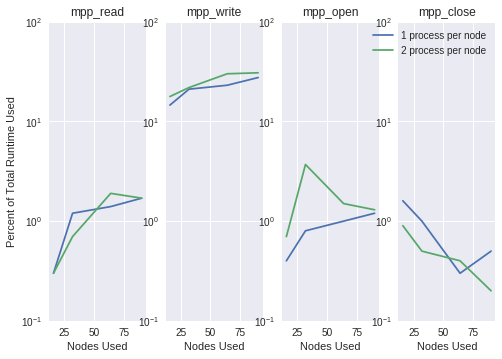

In [13]:
nodes =       [  16,   32,   64,   90 ]

mpp_read_1 =  [ 0.3,  1.2,  1.4,  1.7 ]
mpp_read_2 =  [ 0.3,  0.7,  1.9,  1.7 ]

mpp_write_1 = [14.6, 21.1, 23.1, 27.6 ]
mpp_write_2 = [17.8, 21.9, 30.1, 30.8 ]

mpp_open_1 =  [ 0.4,  0.8,  1.0,  1.2 ]
mpp_open_2 =  [ 0.7,  3.7,  1.5,  1.3 ]

mpp_close_1 = [ 1.6,  1.0,  0.3,  0.5 ]
mpp_close_2 = [ 0.9,  0.5,  0.4,  0.2 ]

plt.subplot(1,4,1)
plt.title("mpp_read");
plt.semilogy(nodes, mpp_read_1, label="1 process per node")
plt.semilogy(nodes, mpp_read_2, label="2 process per node")
plt.ylim([1e-1,100])
plt.ylabel("Percent of Total Runtime Used");
plt.xlabel("Nodes Used")

plt.subplot(1,4,2)
plt.title("mpp_write");
plt.semilogy(nodes, mpp_write_1, label="1 process per node")
plt.semilogy(nodes, mpp_write_2, label="2 process per node")
plt.ylim([1e-1,100])
plt.xlabel("Nodes Used")

plt.subplot(1,4,3)
plt.title("mpp_open");
plt.semilogy(nodes, mpp_open_1, label="1 process per node")
plt.semilogy(nodes, mpp_open_2, label="2 process per node")
plt.ylim([1e-1,100])
plt.xlabel("Nodes Used")

plt.subplot(1,4,4)
plt.title("mpp_close");
plt.semilogy(nodes, mpp_close_1, label="1 process per node")
plt.semilogy(nodes, mpp_close_2, label="2 process per node")
plt.ylim([1e-1,100])

plt.legend()
plt.xlabel("Nodes Used")

Similar results here. Shown this time on a semilog-y plot to accent the effect of the three other parts of I/O that are not nearly as impactful on the runtime, but remain of interest none the less. Here it can be seen that the mpp_close scales down as a percentage of time spent, and in the raw data this show a stable level of efficiency and will be highlighted later on.

### Case 3 - Using all available outputs

Text(0.5,0,'Nodes Used')

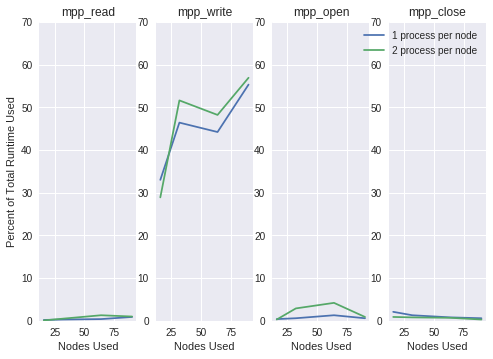

In [14]:
nodes =       [  16,   32,   64,  90 ]

mpp_read_1 =  [ 0.2,  0.3,  0.4,  0.9 ]
mpp_read_2 =  [ 0.1,  0.5,  1.3,  1.0 ]

mpp_write_1 = [33.0, 46.4, 44.2, 55.3 ]
mpp_write_2 = [28.9, 51.6, 48.2, 56.9 ]

mpp_open_1 =  [ 0.4,  0.6,  1.3,  0.6 ]
mpp_open_2 =  [ 0.3,  2.9,  4.2,  0.9 ]

mpp_close_1 = [ 2.1,  1.3,  0.8,  0.6 ]
mpp_close_2 = [ 0.9,  0.8,  0.7,  0.3 ]

plt.subplot(1,4,1)
plt.title("mpp_read");
plt.plot(nodes, mpp_read_1, label="1 process per node")
plt.plot(nodes, mpp_read_2, label="2 process per node")
plt.ylim([0,70])
plt.ylabel("Percent of Total Runtime Used");
plt.xlabel("Nodes Used")

plt.subplot(1,4,2)
plt.title("mpp_write");
plt.plot(nodes, mpp_write_1, label="1 process per node")
plt.plot(nodes, mpp_write_2, label="2 process per node")
plt.ylim([0,70])
plt.xlabel("Nodes Used")

plt.subplot(1,4,3)
plt.title("mpp_open");
plt.plot(nodes, mpp_open_1, label="1 process per node")
plt.plot(nodes, mpp_open_2, label="2 process per node")
plt.ylim([0,70])
plt.xlabel("Nodes Used")

plt.subplot(1,4,4)
plt.title("mpp_close");
plt.plot(nodes, mpp_close_1, label="1 process per node")
plt.plot(nodes, mpp_close_2, label="2 process per node")
plt.ylim([0,70])

plt.legend()
plt.xlabel("Nodes Used")

Returning to the linear scaling here to show the increased impact of the mpp_open function. This shows the increased complexity in the input coordination file used to setup the model run

## Weak scaling study

Now I use the number of cells per node to calculate a relative measure of work done by the different parts of the I/O pipeline.

First shown below is the same as the previous where all data is passed out through I/O, but now there is no normaliziation on the grid scales to get a better intuition about their individual behaviors

Text(0.5,0,'Nodes Used')

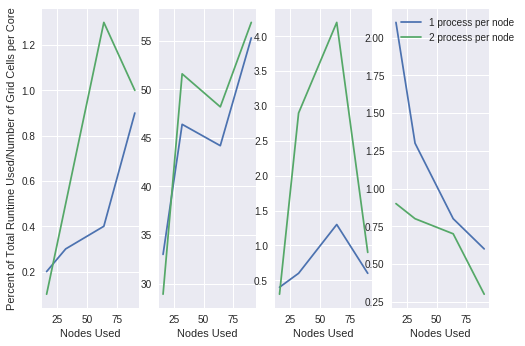

In [16]:
import numpy as np
nodes =       np.array([  16,   32,   64,  90 ])

cells_1 =     np.array([4770, 2340, 1215, 864 ])
cells_2 =     np.array([2340, 1215, 1215, 420 ])

mpp_read_1 =  np.array([ 0.2,  0.3,  0.4,  0.9 ])
mpp_read_2 =  np.array([ 0.1,  0.5,  1.3,  1.0 ])

mpp_write_1 = np.array([33.0, 46.4, 44.2, 55.3 ])
mpp_write_2 = np.array([28.9, 51.6, 48.2, 56.9 ])

mpp_open_1 =  np.array([ 0.4,  0.6,  1.3,  0.6 ])
mpp_open_2 =  np.array([ 0.3,  2.9,  4.2,  0.9 ])

mpp_close_1 = np.array([ 2.1,  1.3,  0.8,  0.6 ])
mpp_close_2 = np.array([ 0.9,  0.8,  0.7,  0.3 ])



plt.subplot(1,4,1)
plt.plot(nodes, mpp_read_1, label="1 process per node")
plt.plot(nodes, mpp_read_2, label="2 process per node")
plt.ylabel("Percent of Total Runtime Used/Number of Grid Cells per Core");
plt.xlabel("Nodes Used")

plt.subplot(1,4,2)
plt.plot(nodes, mpp_write_1, label="1 process per node")
plt.plot(nodes, mpp_write_2, label="2 process per node")
plt.xlabel("Nodes Used")

plt.subplot(1,4,3)
plt.plot(nodes, mpp_open_1, label="1 process per node")
plt.plot(nodes, mpp_open_2, label="2 process per node")
plt.xlabel("Nodes Used")

plt.subplot(1,4,4)
plt.plot(nodes, mpp_close_1, label="1 process per node")
plt.plot(nodes, mpp_close_2, label="2 process per node")

plt.legend()
plt.xlabel("Nodes Used")

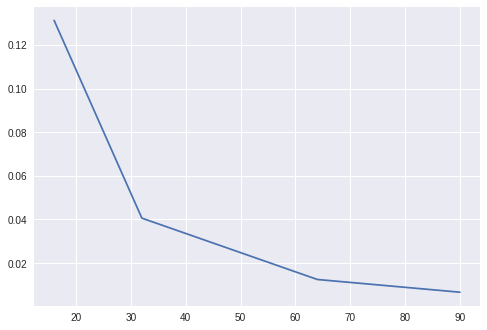

In [46]:
plt.plot(nodes, mpp_close_1/nodes)

Finally below is the data adjusted by number of cells to show the weak scaling

In [31]:
nodes =       np.array([  16,   32,   64,  90 ])

cells_1 =     np.array([4770, 2340, 1215, 864 ])
cells_2 =     np.array([2340, 1215, 1215, 420 ])

mpp_read_1_f =  np.array([ 0.2,  0.3,  0.4,  0.9 ])
mpp_read_2_f =  np.array([ 0.1,  0.5,  1.3,  1.0 ])

mpp_write_1_f = np.array([33.0, 46.4, 44.2, 55.3 ])
mpp_write_2_f = np.array([28.9, 51.6, 48.2, 56.9 ])

mpp_open_1_f =  np.array([ 0.4,  0.6,  1.3,  0.6 ])
mpp_open_2_f =  np.array([ 0.3,  2.9,  4.2,  0.9 ])

mpp_close_1_f = np.array([ 2.1,  1.3,  0.8,  0.6 ])
mpp_close_2_f = np.array([ 0.9,  0.8,  0.7,  0.3 ])

mpp_read_1_s =  [ 0.3,  1.2,  1.4,  1.7 ]
mpp_read_2_s =  [ 0.3,  0.7,  1.9,  1.7 ]

mpp_write_1_s = [14.6, 21.1, 23.1, 27.6 ]
mpp_write_2_s = [17.8, 21.9, 30.1, 30.8 ]

mpp_open_1_s =  [ 0.4,  0.8,  1.0,  1.2 ]
mpp_open_2_s =  [ 0.7,  3.7,  1.5,  1.3 ]

mpp_close_1_s = [ 1.6,  1.0,  0.3,  0.5 ]
mpp_close_2_s = [ 0.9,  0.5,  0.4,  0.2 ]

mpp_read_1_n =  [ 0.2,  0.4,  0.9,  1.2 ]
mpp_read_2_n =  [ 1.2,  0.4,  1.2,  1.7 ]

mpp_write_1_n = [28.1, 34.5, 41.4, 47.6 ]
mpp_write_2_n = [38.3, 40.7, 47.0, 55.2 ]

mpp_open_1_n =  [ 0.4,  0.5,  1.1,  0.9 ]
mpp_open_2_n =  [ 0.6,  0.6,  2.8,  1.7 ]

mpp_close_1_n = [ 1.8,  1.2,  0.7,  0.5 ]
mpp_close_2_n = [ 1.3,  0.7,  0.4,  0.3 ]

Text(0.5,0,'Nodes Used')

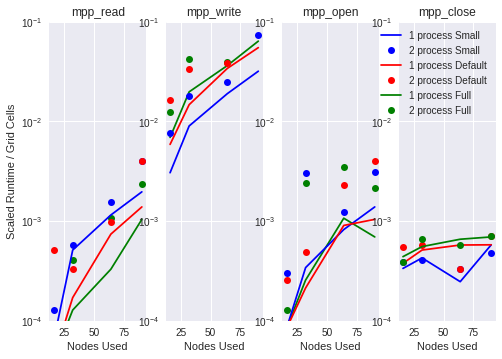

In [41]:
plt.subplot(1,4,1)
plt.semilogy(nodes, mpp_read_1_f/cells_1, "g-")
plt.semilogy(nodes, mpp_read_2_f/cells_2, 'go')
plt.semilogy(nodes, mpp_read_1_s/cells_1, "b-")
plt.semilogy(nodes, mpp_read_2_s/cells_2, 'bo')
plt.semilogy(nodes, mpp_read_1_n/cells_1, "r-")
plt.semilogy(nodes, mpp_read_2_n/cells_2, 'ro')
plt.ylim([1e-4,1e-1])
plt.ylabel("Scaled Runtime / Grid Cells");
plt.xlabel("Nodes Used")
plt.title("mpp_read")

plt.subplot(1,4,2)
plt.semilogy(nodes, mpp_write_1_f/cells_1, "g-")
plt.semilogy(nodes, mpp_write_2_f/cells_2, "go")
plt.semilogy(nodes, mpp_write_1_s/cells_1, "b-")
plt.semilogy(nodes, mpp_write_2_s/cells_2, "bo")
plt.semilogy(nodes, mpp_write_1_n/cells_1, "r-")
plt.semilogy(nodes, mpp_write_2_n/cells_2, "ro")
plt.ylim([1e-4,1e-1])
plt.xlabel("Nodes Used")
plt.title("mpp_write")

plt.subplot(1,4,3)
plt.semilogy(nodes, mpp_open_1_f/cells_1, "g-")
plt.semilogy(nodes, mpp_open_2_f/cells_2, "go")
plt.semilogy(nodes, mpp_open_1_s/cells_1, "b-")
plt.semilogy(nodes, mpp_open_2_s/cells_2, "bo")
plt.semilogy(nodes, mpp_open_1_n/cells_1, "r-")
plt.semilogy(nodes, mpp_open_2_n/cells_2, "ro")
plt.ylim([1e-4,1e-1])
plt.xlabel("Nodes Used")
plt.title("mpp_open")


plt.subplot(1,4,4)
plt.semilogy(nodes, mpp_close_1_s/cells_1, "b-", label="1 process Small")
plt.semilogy(nodes, mpp_close_2_s/cells_2, "bo", label="2 process Small")
plt.semilogy(nodes, mpp_close_1_n/cells_1, "r-", label="1 process Default")
plt.semilogy(nodes, mpp_close_2_n/cells_2, "ro", label="2 process Default")
plt.semilogy(nodes, mpp_close_1_f/cells_1, "g-", label="1 process Full")
plt.semilogy(nodes, mpp_close_2_f/cells_2, "go", label="2 process Full")
plt.ylim([1e-4,1e-1])
plt.title("mpp_close")

plt.legend()
plt.xlabel("Nodes Used")
#plt.savefig("MOM6.png")

### Weak Scaling Data (Shown above)

Note that now the mpp_close is much closer to flat to repesent the independence to the number of nodes. This closing of the  MPI tasks should be relatively independent of nodes as each node should close itself. 

Note additionally, that the general trend of all the remaining three is to have a slowing increase which shows as expected as the serial implementation will take a heavy load the more nodes are used, but that the difference from 10-20 nodes is more significant than the increase from 80-90.

## PnetCDF

Below is data from testing the PnetCDF software. 

All tests were done using the tutorial code provided in the package and adding some additional timing around the total open, read, write, close process.

All data labeled with master refer to having a single master thread that outputs data. Where standard refers to the standard PnetCDF implementation. Specfically these correspond to the pnetcdf-write-from-master.c and pnetcdf-write-standard.c given in the standard installtion. 

The first test here is shown when a set amount of data (32 or 320 MB) was put out by each node. This shows the scaling as the data increases with the number of nodes

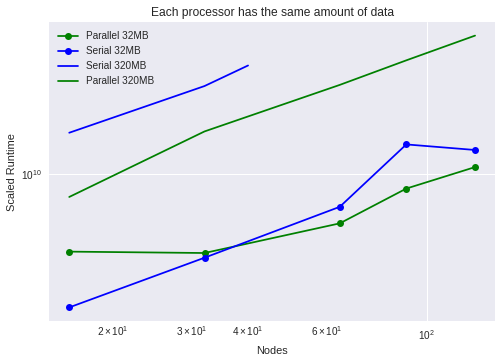

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy as np
plt.style.use('seaborn')

nodes =  [       16,         32,         64,          90,        128 ]

master =  [   68045293,    64924468,   70392032,    98761395,   59370815 ]
master32 =[ 1765463182,  3371355837, 6539828518, 14730866410, 13701620386]
master320=[17149221812, 31491692094, 41153045576]
stand  =  [  438236343,   854381800, 1979066797,  2793847185, 4482315464 ]
stand32=  [ 3649519859,  3584122486, 5272741767,  8292114060, 10967476408]
stand320= [ 7434175406, 17442312452,31970897400, 44011230725, 60717931669]

plt.loglog(nodes, stand32, "go-")
plt.loglog(nodes, master32, "bo-")
plt.loglog([16,32, 40], master320,"b")
plt.loglog(nodes, stand320,"g")
plt.legend(["Parallel 32MB","Serial 32MB","Serial 320MB","Parallel 320MB"])
plt.title("Each processor has the same amount of data")
plt.xlabel("Nodes")
plt.ylabel("Scaled Runtime")

#plt.savefig("PnetCDF-1.png")

The following test is to test when a given pool of data is distributed by nodes. The tests were for distributing 3.2 GB using a given number of nodes. This tests a different metric on the efficiency of nodes using I/O themselves rather than passing that data back to a master thread.

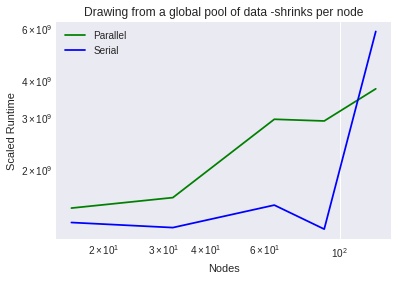

In [8]:
nodes =  [       16,         32,         64,          90,        128 ]

master =  [ 1320023808,  1268692208,  1511918619, 1253676834, 5860233124 ]
stand=    [ 1477314872,  1603051190,  2953662432, 2914690203, 3745570882 ]

plt.loglog(nodes, stand, "g")
plt.loglog(nodes, master, "b")
plt.title("Drawing from a global pool of data -shrinks per node")
plt.xlabel("Nodes")
plt.ylabel("Scaled Runtime")
plt.legend(["Parallel", "Serial"])
#plt.savefig("PnetCDF-2.png")

Thank you for a wonderful semester of HPSC exploration. I have learned a tremendous amount about the field, the details, of implementation, the community involvement, and the blockages that still exist. I also really enjoyed the mathematical portions as they were much more directly phrased than many of the APPM clases I have taken, and in that way felt very practical towards implementation.